## Image clasification for identifying zones of interest
This jupynter notebook will take satelite images and perform clasification to reveal zones in your land that are not visible to the normal eye

## Lets import the libraries we need first

In [ ]:
# import data processing libraries
import numpy as np
from sklearn.cluster import KMeans

# Import image processing  libraries
import skimage
import skimage.io as io
from skimage.color import rgb2lab, lab2rgb

# Import plotting libraries
import matplotlib.pyplot as plt
%matplotlib widget

## Demo
This images are from a random farm location obtained from Sentinel Hub. For images like this you can go to https://apps.sentinel-hub.com/eo-browser/ and export images from your land of interest for free. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


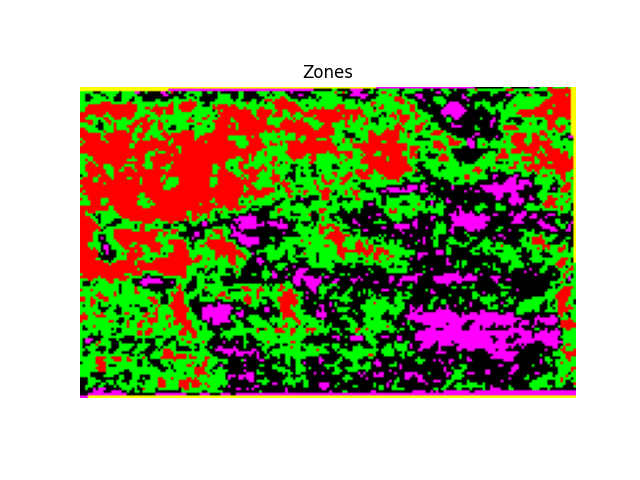

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


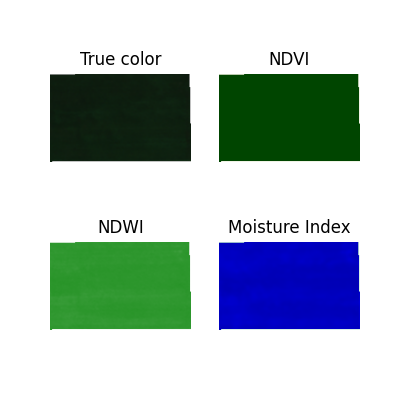

In [3]:
plt.close('all')

# load images
true_color = io.imread("../main/images/image set 3/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color.png")
ndvi = io.imread("../main/images/image set 3/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI.png")
ndwi = io.imread("../main/images/image set 3/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI.png")
moisture_index = io.imread("../main/images/image set 3/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index.png")

# visualize layers from satellite images
fig, axes = plt.subplots(2, 2, figsize=(4, 4))
ax = axes.ravel()

ax[0].imshow(true_color)
ax[0].set_title("True color")
ax[0].axis("Off")
ax[1].imshow(ndvi)
ax[1].set_title("NDVI")
ax[1].axis("Off")
ax[2].imshow(ndwi)
ax[2].set_title("NDWI")
ax[2].axis("Off")
ax[3].imshow(moisture_index)
ax[3].set_title("Moisture Index")
ax[3].axis("Off")


# Make images gray scale
true_color = rgb2lab(true_color[:,:,0:3])
ndvi = rgb2lab(true_color[:,:,0:3])
ndwi = rgb2lab(true_color[:,:,0:3])
moisture_index = rgb2lab(true_color[:,:,0:3])

# Make image cube with all the satellite images as a single channel
w, h, d = original_shape = tuple(true_color.shape)
image_cube = np.zeros((w,h,4))
image_cube[:,:,0] = true_color[:,:,0]
image_cube[:,:,1] = ndvi[:,:,1]
image_cube[:,:,2] = ndwi[:,:,1]
image_cube[:,:,3] = moisture_index[:,:,1]

# Make 4D cube into a nx4 array
image_cube_reshape = np.reshape(image_cube, (w*h,4))

# Lets try to divide our field into 5 different zones
n_zones = 5
# Use a unsupervised machine learning model to separate satellite data into 5 zones
kmeans_zones = KMeans(n_clusters=5, random_state=0).fit(image_cube_reshape)
segmentation_zones = kmeans_zones.predict(image_cube_reshape).reshape(w, h)

# Make color image for better visualization
segmented_image =  np.zeros_like(true_color)
segmented_image[segmentation_zones == 0] =  (0,0,0)  
segmented_image[segmentation_zones == 1] =  (255,255,0) 
segmented_image[segmentation_zones == 2] =  (255,0,0) 
segmented_image[segmentation_zones == 3] =  (255,0,255) 
segmented_image[segmentation_zones == 4] =  (0,255,0)


# Display classification that shows different zones of the land
plt.figure()
plt.imshow(segmented_image, cmap='turbo')
plt.title('Zones')
plt.axis('off')
plt.show() 


# Save zone image
io.imsave('../main/images/image set 3/zones.png',segmented_image)
    


## Put your paths were indicated and then run this cell for running your own

In [ ]:
plt.close('all')

# load images
true_color = io.imread("put the path to your true color image here")
ndvi = io.imread("put the path to your true ndvi image here")
ndwi = io.imread("put the path to your true ndwi image here")
moisture_index = io.imread("put the path to your Moisture Index image here")

# visualize layers from satellite images
fig, axes = plt.subplots(2, 2, figsize=(4, 4))
ax = axes.ravel()

ax[0].imshow(true_color)
ax[0].set_title("True color")
ax[0].axis("Off")
ax[1].imshow(ndvi)
ax[1].set_title("NDVI")
ax[1].axis("Off")
ax[2].imshow(ndwi)
ax[2].set_title("NDWI")
ax[2].axis("Off")
ax[3].imshow(moisture_index)
ax[3].set_title("Moisture Index")
ax[3].axis("Off")


# Make images gray scale
true_color = rgb2lab(true_color[:,:,0:3])
ndvi = rgb2lab(true_color[:,:,0:3])
ndwi = rgb2lab(true_color[:,:,0:3])
moisture_index = rgb2lab(true_color[:,:,0:3])

# Make image cube with all the satellite images as a single channel
w, h, d = original_shape = tuple(true_color.shape)
image_cube = np.zeros((w,h,4))
image_cube[:,:,0] = true_color[:,:,0]
image_cube[:,:,1] = ndvi[:,:,1]
image_cube[:,:,2] = ndwi[:,:,1]
image_cube[:,:,3] = moisture_index[:,:,1]

# Make 4D cube into a nx4 array
image_cube_reshape = np.reshape(image_cube, (w*h,4))

# Lets try to divide our field into 5 different zones
n_zones = 5
# Use a unsupervised machine learning model to separate satellite data into 5 zones
kmeans_zones = KMeans(n_clusters=5, random_state=0).fit(image_cube_reshape)
segmentation_zones = kmeans_zones.predict(image_cube_reshape).reshape(w, h)

# Make color image for better visualization
segmented_image =  np.zeros_like(true_color)
segmented_image[segmentation_zones == 0] =  (0,0,0)  
segmented_image[segmentation_zones == 1] =  (255,255,0) 
segmented_image[segmentation_zones == 2] =  (255,0,0) 
segmented_image[segmentation_zones == 3] =  (255,0,255) 
segmented_image[segmentation_zones == 4] =  (0,255,0)


# Display classification that shows different zones of the land
plt.figure()
plt.imshow(segmented_image, cmap='turbo')
plt.title('Zones')
plt.axis('off')
plt.show() 


# Save zone image
io.imsave('put your save path here',segmented_image)
    
